<a href="https://colab.research.google.com/github/deondrae4088/CryptoClustering/blob/main/Crypto_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Import required libraries and dependencies

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/content/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [47]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [48]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df)

In [49]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(
    market_data_scaled,
    columns=market_data_df.columns
)

# Copy the crypto names from the original data
market_data_scaled_df["coin_id"] = market_data_df.index
# Set the coinid column as index


# Display sample data
market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


### Find the Best Value for k Using the Original Scaled DataFrame.

In [50]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(market_data_scaled_df.drop("coin_id", axis=1))
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

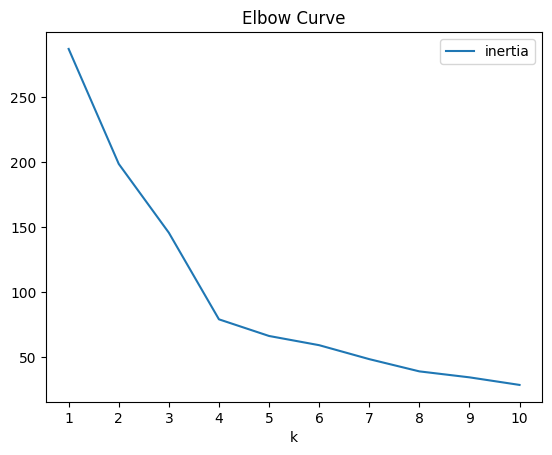

In [51]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia", title="Elbow Curve", xticks=k_values)

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:**  4 would be the best value for k

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [52]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [53]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled_df.drop("coin_id", axis=1))

KMeans(n_clusters=4, random_state=0)

In [54]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = model.predict(market_data_scaled_df.drop("coin_id", axis=1))

# Print the resulting array of cluster values.
print(cluster_predictions)
# View the resulting array of cluster values.
cluster_predictions

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [55]:
# Create a copy of the DataFrame
market_data_df_copy = market_data_df.copy()

In [56]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_copy["cluster"] = cluster_predictions

# Display sample data
display(market_data_df_copy.head(5))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


<Axes: title={'center': 'Cluster by Price Change'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

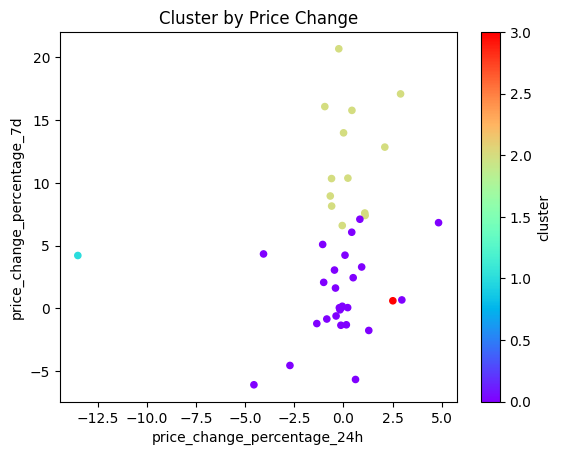

In [57]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_copy.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="cluster", colormap="rainbow", title="Cluster by Price Change")

### Optimize Clusters with Principal Component Analysis.

In [58]:
# Create a PCA model instance and set `n_components=3`.
PCA_model = PCA(n_components=3)

In [59]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
PCA_data = PCA_model.fit_transform(market_data_scaled_df.drop("coin_id", axis=1))

# View the first five rows of the DataFrame.
PCA_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [60]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = PCA_model.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**. This value will be between 0 and 1, where the higher value indicates that the three principal components explain a greater proportion of the originals data variance

In [61]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
PCA_df = pd.DataFrame(
    PCA_data,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
PCA_df["coin_id"] = market_data_df.index
# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
PCA_df["coin_id"] = market_data_df.index

# Set the coinid column as index
PCA_df.set_index("coin_id", inplace=True)

# Display sample data
display(PCA_df.head(10))

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [62]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
K_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in K_values:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(PCA_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": K_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df

# Display the DataFrame
elbow_df.head(10)

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

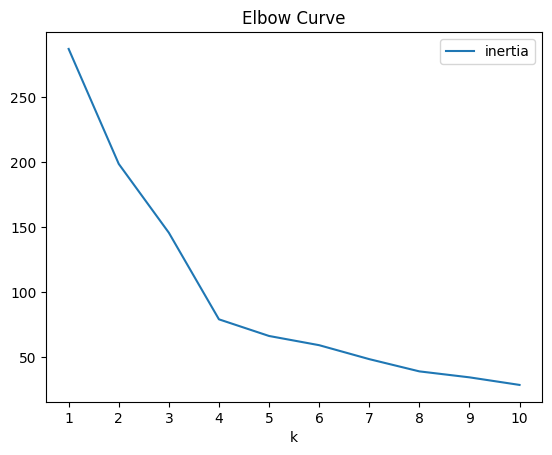

In [63]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia", title="Elbow Curve", xticks=K_values)

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it doesn't They are both equal to 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [64]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [65]:
# Fit the K-Means model using the PCA data
model.fit(PCA_df)

KMeans(n_clusters=4, random_state=0)

In [66]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = model.predict(PCA_df)

# View the resulting array of cluster values.
print(cluster_predictions)

# Print the resulting array of cluster values.
cluster_predictions

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [67]:
# Create a copy of the DataFrame with the PCA data
PCA_df_copy = PCA_df.copy()

# Add a new column to the DataFrame with the predicted clusters
PCA_df_copy["cluster"] = cluster_predictions

# Display sample data
display(PCA_df_copy.head(5))

,PCA1,PCA2,PCA3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [68]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
PCA_df_copy.hvplot.scatter(x="PCA1", y="PCA2", by="cluster", hover_cols=["coin_id"])

:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [70]:
# Use the columns from the original scaled DataFrame as the index.
PCA_df_scaled = pd.DataFrame(
    market_data_scaled,
    columns=market_data_df.columns
)

#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
    